<a href="https://colab.research.google.com/github/KaiyaBullock/MAT421/blob/main/ModH_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.4 Numerical Error and Instability

There are two main issues to consider in reguard to integration schemes for ODE's: accuracy and stability.

Accuracy is defined as the schemes ability to get close to the exact solution as a function of the step size $h$

Stability is its ability to keep the error from growing as it integrates forward for a time. If the error does not grow, it is stable. If it does grow, or only grows some of the time, it is unstable.

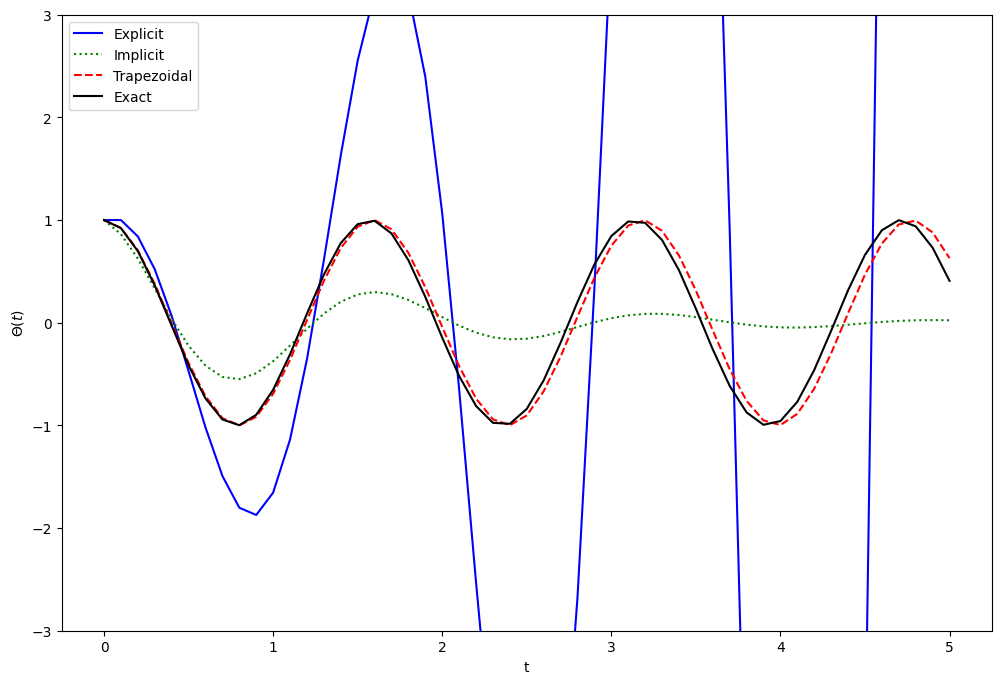

In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

%matplotlib inline

h = 0.1
t = np.arange(0, 5.1, h)
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],[w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],[w**2*h/2, 1]])),
           np.array([[1, h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0,:] = s0.T
s_i[0,:] = s0.T
s_t[0,:] = s0.T

for j in range(0, len(t)-1):
  s_e[j+1,:] = np.dot(m_e, s_e[j, :])
  s_i[j+1,:] = np.dot(m_i, s_i[j, :])
  s_t[j+1,:] = np.dot(m_t, s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t, s_e[:, 0],'b-')
plt.plot(t, s_i[:, 0],'g:')
plt.plot(t, s_t[:, 0],'r--')
plt.plot(t, np.cos(w*t),'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit','Implicit','Trapezoidal', 'Exact'])
plt.show()

# 22.5 Predictor-Corrector and Runge Kutta Methods

Predictor-Corrector methods of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the $F$ function several times at different locations, and then using a weighted average of the result to update the state.

Runge Kutta methods use the same principles as Euler's method by taking terms in Taylor series to approxiamte the numerical integration, but RK uses more than the first two.

# 22.6 Python ODE Solvers

Let $F$ be a function so that $\frac{dS(t)}{dt}=F(t,S(t)), S(t0)=S0$

$S(t)$ is an $n$-dimensional vector and $F(t,S(t))$ defines the differential equation. $S0$ is the initail value for $S$. We want $S(t)$ to approximately satisfy the differential equation, given the initial value.

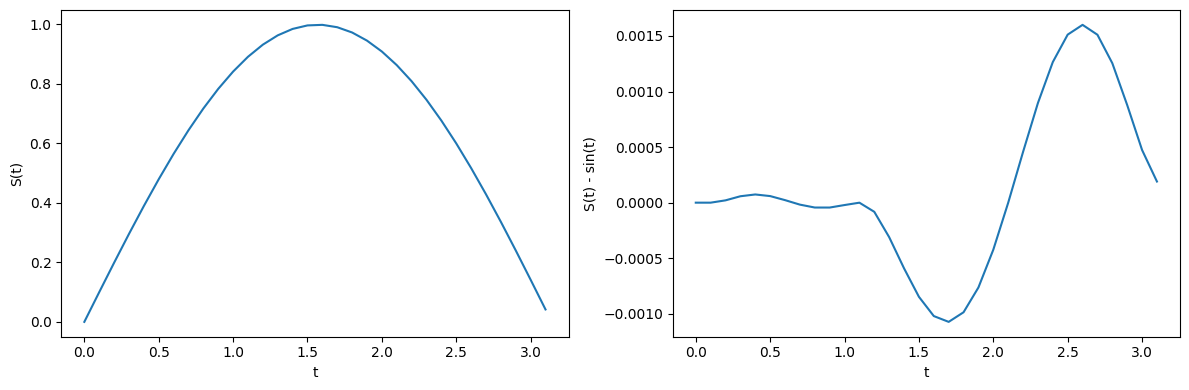

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))

plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')

plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')

plt.tight_layout()
plt.show()